In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import plotly.express as px

In [148]:
# Open the zip file
with ZipFile('names.zip', 'r') as zip_ref:
    # Create a dictionary to store dataframes
    dfs = {}
    # Loop through each file
    for text_file in zip_ref.infolist():
        if text_file.filename.endswith('.txt'):
            # Open each file
            with zip_ref.open(text_file.filename) as file:
                # Read the file into a dataframe
                df = pd.read_csv(BytesIO(file.read()),encoding='utf-8',engine='python', header=None)
                # Extract the year of birth from the filename and add it as a new column
                df['birthYear'] = text_file.filename[3:-4]
                # Store the dataframe in the dictionary
                dfs[text_file.filename] = df
                    

# Concatenate all dataframes in the dictionary into one dataframe
df_Name = pd.concat(dfs,ignore_index=True)   

In [149]:
df_Name.head()

,0,1,2,birthYear
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [150]:
df_Name.rename(columns = {0:'name',1:'gender',2:'nameCount'},inplace = True)

In [151]:
df_Name.head()

,name,gender,nameCount,birthYear
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [152]:
df_Name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085158 entries, 0 to 2085157
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   name       object
 1   gender     object
 2   nameCount  int64 
 3   birthYear  object
dtypes: int64(1), object(3)
memory usage: 63.6+ MB


In [153]:
# change the type of birthyear

df_Name['birthYear'] = df_Name['birthYear'].astype('int')
df_Name['nameCount'] = df_Name['nameCount'].astype('int')
df_Name['gender'] = df_Name['gender'].astype('category')

In [154]:
df_Name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085158 entries, 0 to 2085157
Data columns (total 4 columns):
 #   Column     Dtype   
---  ------     -----   
 0   name       object  
 1   gender     category
 2   nameCount  int32   
 3   birthYear  int32   
dtypes: category(1), int32(2), object(1)
memory usage: 33.8+ MB


In [155]:
df_Name.isnull().sum()

name         0
gender       0
nameCount    0
birthYear    0
dtype: int64

In [75]:
df_Name.birthYear.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Then, visualize the number of male and female babies born in a particular
year with the help of pandas

In [76]:
df_yearCount = df_Name.groupby(['gender', 'birthYear']).size().reset_index(name='counts')

In [77]:
df_yearCount

,gender,birthYear,counts
0,F,1880,942
1,F,1881,938
2,F,1882,1028
3,F,1883,1054
4,F,1884,1172
...,...,...,...
281,M,2018,14095
282,M,2019,14112
283,M,2020,14032
284,M,2021,14057


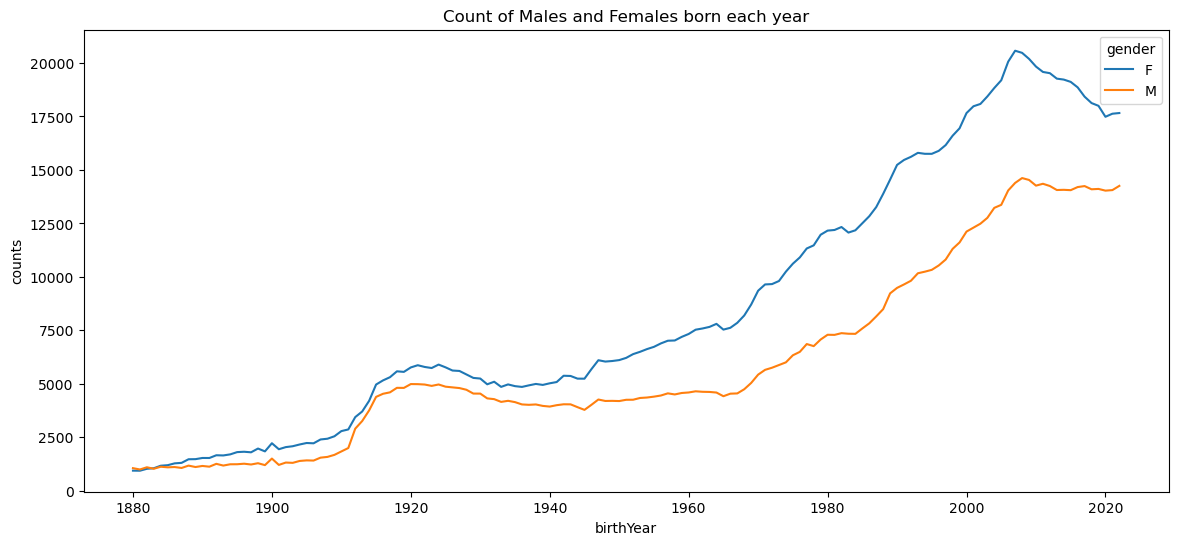

In [79]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_yearCount,x='birthYear',y= 'counts',hue = 'gender')
plt.title('Count of Males and Females born each year')
plt.show()

In [81]:
filt = (df_Name['birthYear'] ==2020)
df_Name[filt].gender.value_counts()

F    17485
M    14032
Name: gender, dtype: int64

then analyze baby names
by sorting out all birth counts

In [113]:
#top 100 most used/common baby names from 1880-2022
df_popular = df_Name.groupby(['name','gender']).agg(birthCount =('nameCount','sum')).reset_index().sort_values('birthCount',ascending = False).head(100)

In [114]:
df_popular

,name,gender,birthCount
81507,James,M,5214844
90449,John,M,5158428
158015,Robert,M,4838129
132737,Michael,M,4401604
195703,William,M,4167487
...,...,...,...
625,Aaron,M,601469
189691,Tyler,M,598241
147792,Pamela,F,594790
64732,Frances,F,593120


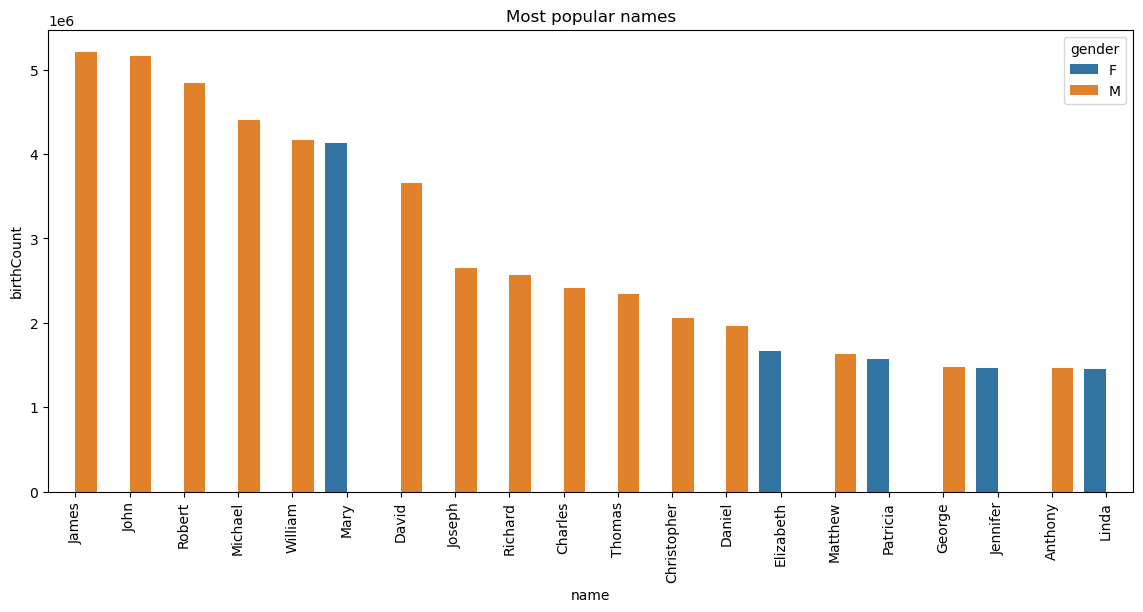

In [132]:
plt.figure(figsize=(14,6))
sns.barplot(data = df_popular.head(20),x='name',y= 'birthCount',hue = 'gender')
plt.xticks(rotation = 90)
plt.title('Most popular names')
plt.show()

In [120]:
#most popular names yearwise
df_mostPopular = df_Name.groupby(['birthYear','name','gender']).agg(birthCount =('nameCount','sum')).reset_index().sort_values(['birthYear','birthCount'],ascending = False)

In [116]:
df_mostPopular

,birthYear,name,gender,birthCount
29212485,2022,Liam,M,20456
29238767,2022,Noah,M,18621
29241122,2022,Olivia,F,16573
29241109,2022,Oliver,M,15076
29154436,2022,Emma,F,14435
...,...,...,...,...
204893,1880,Zyyanna,M,0
204894,1880,Zyyon,F,0
204895,1880,Zyyon,M,0
204896,1880,Zzyzx,F,0


In [138]:
filt =  df_mostPopular.groupby(['birthYear','gender'])['birthCount'].idxmax()
most_popular_names = df_mostPopular.loc[filt].sort_values('birthYear',ascending = False ).reset_index()

In [139]:
most_popular_names

,index,birthYear,name,gender,birthCount
0,29212485,2022,Liam,M,20456
1,29241122,2022,Olivia,F,16573
2,29007587,2021,Liam,M,20365
3,29036224,2021,Olivia,F,17798
4,28802689,2020,Liam,M,19828
...,...,...,...,...,...
281,500245,1882,John,M,9557
282,333222,1881,Mary,F,6919
283,295347,1881,John,M,8769
284,90449,1880,John,M,9655


In [ ]:
# most popular names decade wise

In [173]:
df_Name['decade'] = (df_Name['birthYear']//10)*10

In [174]:
df_Name['decade'] = df_Name['decade'].astype(str) +"'" +'s'

In [175]:
df_Name['decade'].unique()

array(["1880's", "1890's", "1900's", "1910's", "1920's", "1930's",
       "1940's", "1950's", "1960's", "1970's", "1980's", "1990's",
       "2000's", "2010's", "2020's"], dtype=object)

In [177]:
df_Name

,name,gender,nameCount,birthYear,decade
0,Mary,F,7065,1880,1880's
1,Anna,F,2604,1880,1880's
2,Emma,F,2003,1880,1880's
3,Elizabeth,F,1939,1880,1880's
4,Minnie,F,1746,1880,1880's
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,2020's
2085154,Zydn,M,5,2022,2020's
2085155,Zylon,M,5,2022,2020's
2085156,Zymeer,M,5,2022,2020's


In [178]:
 df_decade_Popular=df_Name.groupby(['decade','name','gender']).agg(birthCount =('nameCount','sum')).reset_index().sort_values(['decade','birthCount'],ascending = False)

In [179]:
filt =  df_decade_Popular.groupby(['decade','gender'])['birthCount'].idxmax()
popular_names_everyDecade = df_decade_Popular.loc[filt].sort_values('decade',ascending = False ).reset_index()

In [180]:
popular_names_everyDecade

,index,decade,name,gender,birthCount
0,2985541,2020's,Liam,M,60649
1,3014178,2020's,Olivia,F,52035
2,2806925,2010's,Noah,M,183172
3,2722594,2010's,Emma,F,194917
4,2537163,2000's,Jacob,M,273992
5,2517610,2000's,Emily,F,223734
6,2386615,1990's,Michael,M,462390
7,2342234,1990's,Jessica,F,303118
8,2181717,1980's,Michael,M,663827
9,2137336,1980's,Jessica,F,469518


In [200]:
fig.update_layout(autosize=False, width=1000, height=600)
fig = px.bar(popular_names_everyDecade, x="decade", y="birthCount", color="gender", hover_data=['name'],barmode='group')
fig.show()